In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [69]:
# Load ground-truth sf data
df_sf = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2025_rev/data/sf_tent.csv')

# Drop rows with NaN in 'date' column
df_sf = df_sf.dropna(subset=['date'], axis=0)

# Create timestamp column in df_sf using year, month, and day
df_sf.rename(columns={'date': 'day'}, inplace=True)
df_sf['timestamp'] = pd.to_datetime(df_sf[['year', 'month', 'day']])

df_sf

,year,month,day,tents,structure,sites,tent_struc,timestamp
3,2019,4,23.0,207.0,173.0,442.0,380,2019-04-23
4,2019,4,24.0,207.0,173.0,442.0,380,2019-04-24
5,2019,7,23.0,264.0,187.0,437.0,451,2019-07-23
6,2019,7,24.0,264.0,187.0,437.0,451,2019-07-24
7,2019,10,23.0,272.0,175.0,501.0,447,2019-10-23
8,2020,1,22.0,459.0,190.0,601.0,649,2020-01-22
9,2020,4,20.0,897.0,211.0,427.0,1108,2020-04-20
10,2020,4,21.0,897.0,211.0,427.0,1108,2020-04-21
11,2020,4,22.0,897.0,211.0,427.0,1108,2020-04-22
12,2020,7,29.0,790.0,213.0,426.0,1003,2020-07-29


In [70]:
df_baseline = pd.read_csv('data/city_daily_predictions_baselines.csv')
df_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0


In [71]:
# Convert data in df_baseline to timestamp
df_baseline['timestamp'] = pd.to_datetime(df_baseline['date'])
df_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0,2016-01-01
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0,2016-01-02
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0,2016-01-03
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0,2016-01-04
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0,2016-01-05


In [72]:
# Merge df_baseline and df_sf on 'timestamp'
df_merge_baseline = df_baseline.merge(df_sf[df_sf['timestamp'] < '2025-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

In [73]:
df_merge_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp,tents,tent_struc
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0,2016-01-01,NaN,NaN
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0,2016-01-02,NaN,NaN
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0,2016-01-03,NaN,NaN
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0,2016-01-04,NaN,NaN
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0,2016-01-05,NaN,NaN


In [74]:
# Load Naive and GLM predictions for comparison
df_baseline2 = pd.read_csv('data/city_daily_predictions_threshold_sweep2.csv')

In [76]:
# Convert data in df_baseline2 to timestamp
df_baseline2['timestamp'] = pd.to_datetime(df_baseline2['date'])

# Merge df_baseline2 and df_sf on 'timestamp'
df_merge_baseline2 = df_baseline2[(df_baseline2['p_thresh']==0.7)&(df_baseline2['model']=="PoissonGLM_L2")].merge(df_sf[df_sf['timestamp'] < '2025-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')
df_merge_baseline3 = df_baseline2[(df_baseline2['p_thresh']==0.6)&(df_baseline2['model']=="SeasonalNaive_lag7")].merge(df_sf[df_sf['timestamp'] < '2025-01-01'][['timestamp', 'tents', 'tent_struc']], on='timestamp', how='left')

# Concatenate df_merge_baseline and df_merge_baseline2
df_merge_baseline = pd.concat([df_merge_baseline[df_merge_baseline['model'] == 'LightGBM-Poisson'], df_merge_baseline2, df_merge_baseline3], ignore_index=True)
df_merge_baseline.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp,tents,tent_struc,p_thresh
0,2016-01-01,264.518330,265.528,241.00,264.0,293.00,200,LightGBM-Poisson,40.0,2016-01-01,NaN,NaN,NaN
1,2016-01-02,300.936071,299.486,271.00,300.0,331.00,226,LightGBM-Poisson,69.0,2016-01-02,NaN,NaN,NaN
2,2016-01-03,201.335673,202.120,179.00,202.0,226.00,148,LightGBM-Poisson,71.0,2016-01-03,NaN,NaN,NaN
3,2016-01-04,248.946792,248.376,222.95,249.0,273.00,181,LightGBM-Poisson,102.0,2016-01-04,NaN,NaN,NaN
4,2016-01-05,558.361832,557.620,519.00,557.0,595.05,421,LightGBM-Poisson,85.0,2016-01-05,NaN,NaN,NaN


In [77]:
df_merge_baseline['model'].unique()

array(['LightGBM-Poisson', 'PoissonGLM_L2', 'SeasonalNaive_lag7'],
      dtype=object)

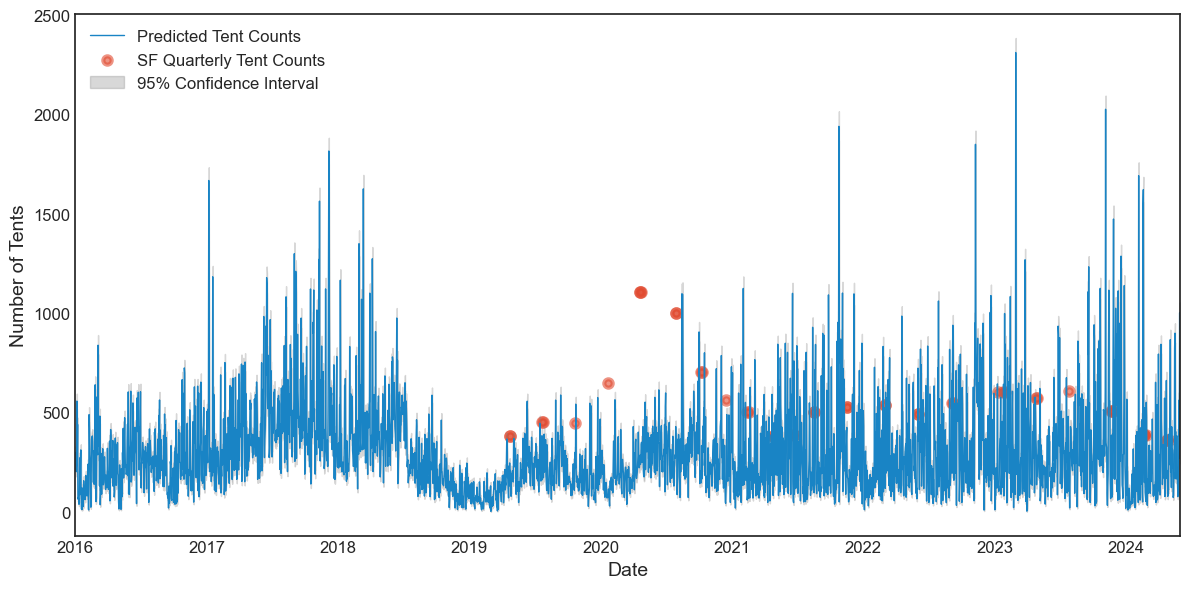

In [78]:
# Baseline: LightGBM-Poisson model predictions vs SF Quarterly Tent Counts

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Predicted mean
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_mean'], 
    label='Predicted Tent Counts', 
    color='#1984c5',
    linewidth=1
)

plt.scatter(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

# Uncertainty band
plt.fill_between(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'],
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_q05'],
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_q95'],
    color='grey',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
#plt.ylim(0,1200)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

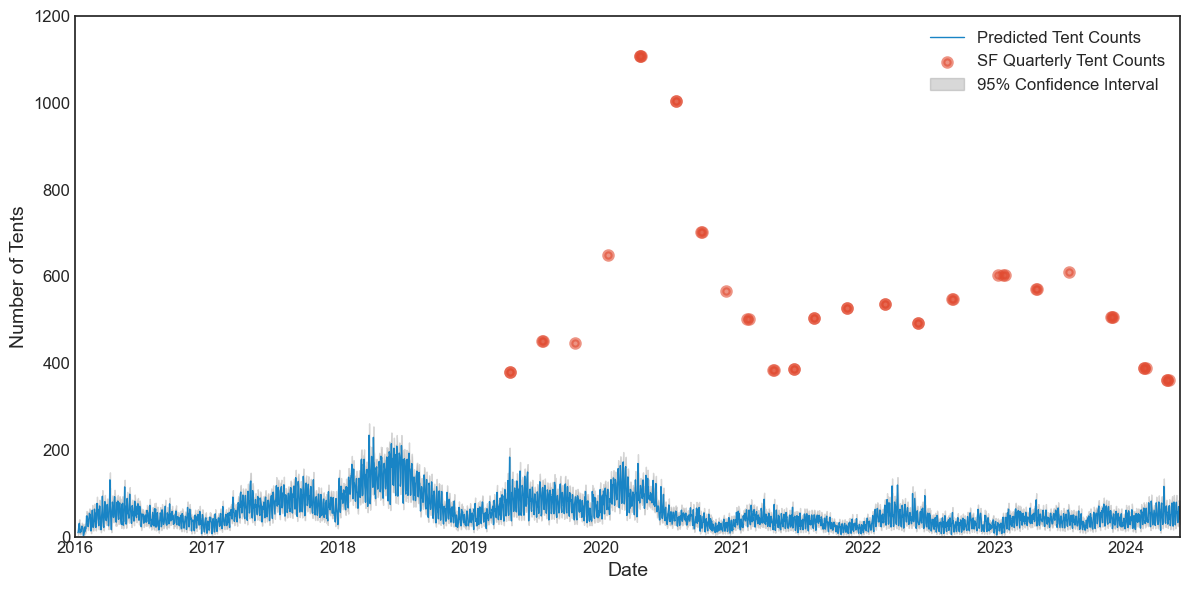

In [79]:
# Baseline: GLM model predictions vs SF Quarterly Tent Counts

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Predicted mean
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_mean'], 
    label='Predicted Tent Counts', 
    color='#1984c5',
    linewidth=1
)

plt.scatter(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

# Uncertainty band
plt.fill_between(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'],
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_q05'],
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_q95'],
    color='grey',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(0,1200)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

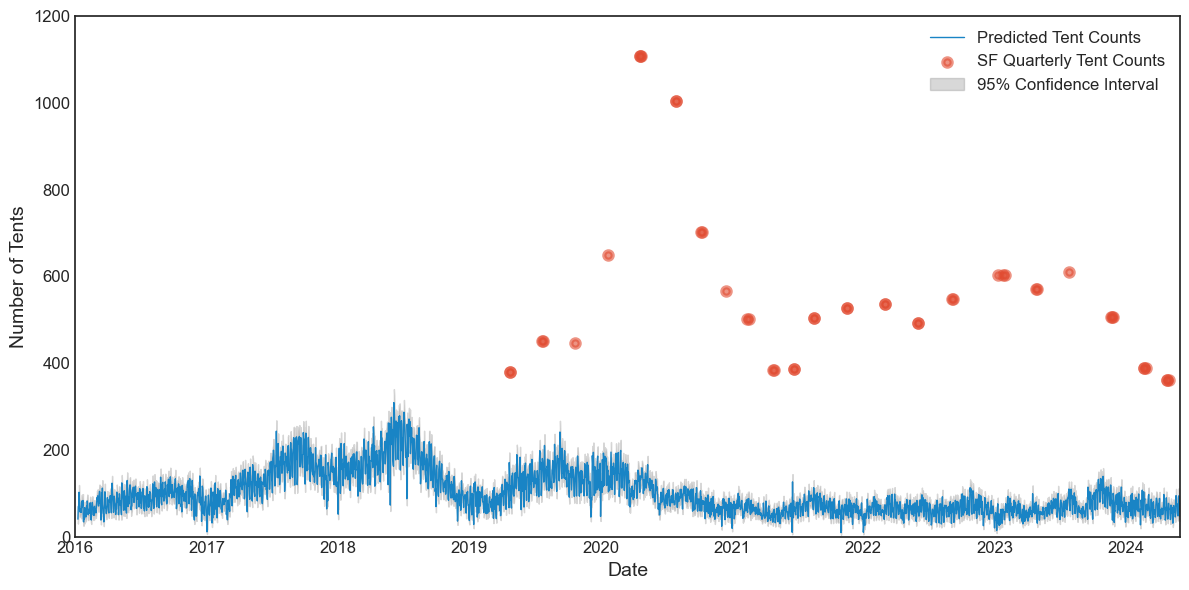

In [80]:
# Baseline: SeasonalNaive_lag7 model predictions vs SF Quarterly Tent Counts

import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# Predicted mean
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_mean'], 
    label='Predicted Tent Counts', 
    color='#1984c5',
    linewidth=1
)

plt.scatter(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

# Uncertainty band
plt.fill_between(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'],
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_q05'],
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_q95'],
    color='grey',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(0,1200)
plt.xlim(start_date, end_date)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [110]:
# Calculate RMSE, MAPE, Poisson Deviance, and NLPD for each model in the baseline dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import poisson
from scipy.special import gammaln

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    poisson_deviance = -2 * (poisson.logpmf(y_true, y_pred).sum())
    nlpd = -poisson.logpmf(y_true, y_pred).mean()

    return rmse, mape, poisson_deviance, nlpd

metrics_results = []
for model in df_merge_baseline['model'].unique():
    df_model = df_merge_baseline[df_merge_baseline['model'] == model]
    y_true = df_model[df_model['tent_struc'].notnull()]['tent_struc']
    y_pred = df_model[df_model['tent_struc'].notnull()]['sim_mean']
    rmse, mape, poisson_deviance, nlpd = calculate_metrics(y_true, y_pred)
    metrics_results.append({
        'model': model,
        'RMSE': rmse,
        'MAPE': mape,
        'Poisson Deviance': poisson_deviance,
        'NLPD': nlpd
    })

metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df.sort_values(by='RMSE').reset_index(drop=True)
metrics_df

,model,RMSE,MAPE,Poisson Deviance,NLPD
0,LightGBM-Poisson,395.047543,0.572704,22081.788607,245.353207
1,SeasonalNaive_lag7,512.770989,0.837870,57457.851502,638.420572
2,PoissonGLM_L2,538.497537,0.884222,77735.460797,863.727342


In [102]:
df_merge_baseline['model'].unique()

array(['LightGBM-Poisson', 'PoissonGLM_L2', 'SeasonalNaive_lag7'],
      dtype=object)

In [104]:
df_merge_baseline_eval = df_merge_baseline.dropna(subset=['tent_struc'])
df_merge_baseline_eval.head()

,date,expected_total,sim_mean,sim_q05,sim_q50,sim_q95,active_boxes,model,city_truth,timestamp,tents,tent_struc,p_thresh
1208,2019-04-23,245.150142,246.240,221.95,246.0,270.05,177,LightGBM-Poisson,124.0,2019-04-23,207.0,380.0,NaN
1209,2019-04-24,142.257974,142.668,122.95,143.0,163.00,101,LightGBM-Poisson,147.0,2019-04-24,207.0,380.0,NaN
1299,2019-07-23,161.199296,161.566,141.00,161.0,182.00,108,LightGBM-Poisson,173.0,2019-07-23,264.0,451.0,NaN
1300,2019-07-24,230.160544,231.310,207.95,231.0,256.05,161,LightGBM-Poisson,154.0,2019-07-24,264.0,451.0,NaN
1391,2019-10-23,220.045757,219.784,198.00,219.0,243.00,145,LightGBM-Poisson,173.0,2019-10-23,272.0,447.0,NaN


In [111]:
# Calculate RMSE, MAPE, Poisson Deviance, and NLPD for each model in the baseline dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import poisson

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    poisson_deviance = -2 * (poisson.logpmf(y_true, y_pred).sum())
    nlpd = -poisson.logpmf(y_true, y_pred).mean()
    return rmse, mape, poisson_deviance, nlpd

metrics_results = []
for model in df_merge_baseline_eval['model'].unique():
    df_model = df_merge_baseline_eval[df_merge_baseline_eval['model'] == model]
    y_true = df_model[df_model['tent_struc'].notnull()]['tent_struc']
    y_pred = df_model[df_model['tent_struc'].notnull()]['sim_mean']
    rmse, mape, poisson_deviance, nlpd = calculate_metrics(y_true, y_pred)
    metrics_results.append({
        'model': model,
        'RMSE': rmse,
        'MAPE': mape,
        'Poisson Deviance': poisson_deviance,
        'NLPD': nlpd
    })

metrics_df = pd.DataFrame(metrics_results)
metrics_df = metrics_df.sort_values(by='RMSE').reset_index(drop=True)
metrics_df

,model,RMSE,MAPE,Poisson Deviance,NLPD
0,LightGBM-Poisson,395.047543,0.572704,22081.788607,245.353207
1,SeasonalNaive_lag7,512.770989,0.837870,57457.851502,638.420572
2,PoissonGLM_L2,538.497537,0.884222,77735.460797,863.727342


In [113]:
(5180 - 4380) / 4380 * 100  # Percentage improvement from baseline to ST-VGP

18.2648401826484

In [82]:
# Load our model's predictions for comparison with baseline models
df_stvgp = pd.read_csv('data/df_daily_69_noclamp_with_sf_tent.csv')
df_stvgp['timestamp'] = pd.to_datetime(df_stvgp['timestamp'])
df_stvgp.head()

,timestamp,mean_total,median_total,lower95,upper95,lower90,upper90,tents,tent_struc
0,2016-01-01,164.700,164.0,140.475,193.000,144.95,188.0,NaN,NaN
1,2016-01-02,193.914,194.0,168.475,220.525,172.00,216.0,NaN,NaN
2,2016-01-03,222.442,222.0,193.000,251.000,197.00,247.0,NaN,NaN
3,2016-01-04,228.514,229.0,200.000,256.000,205.00,252.0,NaN,NaN
4,2016-01-05,194.942,195.0,168.000,222.000,172.00,219.0,NaN,NaN


In [112]:
# Calculate RMSE, MAPE, Poisson Deviance, and NLPD for df_STVGP
df_stvgp = df_stvgp.dropna(subset=['tent_struc'])
df_stvgp.head()

metrics_results_stvgp = []
y_true = df_stvgp['tent_struc']
y_pred = df_stvgp['mean_total']
rmse, mape, poisson_deviance, nlpd = calculate_metrics(y_true, y_pred)
metrics_results_stvgp.append({
    'model': 'ST-VGP',
    'RMSE': rmse,
    'MAPE': mape,
    'Poisson Deviance': poisson_deviance,
    'NLPD': nlpd
})
metrics_df_stvgp = pd.DataFrame(metrics_results_stvgp)
metrics_df_stvgp = metrics_df_stvgp.sort_values(by='RMSE').reset_index(drop=True)
metrics_df_stvgp

,model,RMSE,MAPE,Poisson Deviance,NLPD
0,ST-VGP,249.569322,0.338873,5942.182209,66.024247


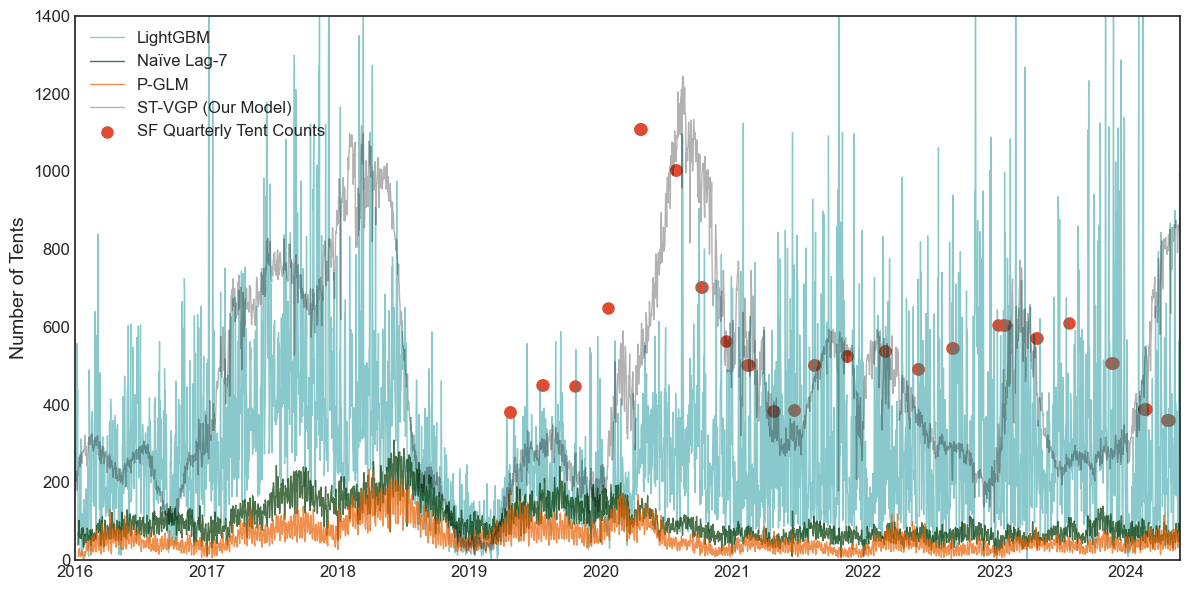

In [101]:
# Compare ST-VGP with Baseline models

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2024, 5, 31)

# Plot time-series
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-white')

# LightGBM-Poisson
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='LightGBM-Poisson']['sim_mean'], 
    label='LightGBM', 
    color='#179599',
    alpha=0.5,
    linewidth=1
)

# Seasonal Naive Lag 7
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='SeasonalNaive_lag7']['sim_mean'], 
    label='Naïve Lag-7', 
    color='#003600',
    alpha=0.7,
    linewidth=1
)

# PoissonGLM_L2
plt.plot(
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['timestamp'], 
    df_merge_baseline[df_merge_baseline['model']=='PoissonGLM_L2']['sim_mean'], 
    label='P-GLM', 
    color='#ed5f00',
    alpha=0.7,
    linewidth=1
)


# ST-VGP
plt.plot(
    df_stvgp['timestamp'], 
    df_stvgp['mean_total'], 
    label='ST-VGP (Our Model)', 
    color='black',
    alpha=0.3,
    linewidth=1
)

plt.scatter(
    df_stvgp['timestamp'], 
    df_stvgp['tent_struc'], 
    label='SF Quarterly Tent Counts', 
    alpha=1, 
    marker='o',
    color='#e14b31',
    linewidth=3
)

#plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tents', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(start_date, end_date)
plt.ylim(0,1400)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()